In [1]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

import os

In [2]:
data = pd.read_csv("parkinsons_updrs.data.csv")

In [3]:
data.drop(["motor_UPDRS"], axis=1, inplace=True)
data.drop(["subject#"], axis=1, inplace=True)

In [4]:
X = data.drop(["total_UPDRS"], axis=1) 
y = data.total_UPDRS.values

In [5]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
featsel = ExtraTreesRegressor(n_estimators=25) #can change the number of n_estimators
featsel = featsel.fit(X, y)
featsel.feature_importances_
model = SelectFromModel(featsel, prefit=True)
X_new = model.transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [6]:
from sklearn.model_selection import train_test_split 

#Splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)

In [7]:
from sklearn.ensemble import BaggingRegressor 

regr = BaggingRegressor(n_estimators=25, random_state=1) #using default DecisionTreeRegressor
regr.fit(x_train, y_train)

BaggingRegressor(n_estimators=25, random_state=1)

In [8]:
from sklearn.datasets import make_regression
from math import sqrt  # For squareroot operation
from sklearn.metrics import mean_squared_error  # For MSE
from sklearn.metrics import r2_score  # For find accuracy with R2 Score

y_pred_bagged_train = regr.predict(x_train)
y_pred_bagged_test = regr.predict(x_test)

r2_bagged_train = r2_score(y_train, y_pred_bagged_train)
print("Training R^2 for Bagged Trees Model: ", r2_bagged_train*100)

r2_bagged_test = r2_score(y_test, y_pred_bagged_test)
print("Testing R^2 for Bagged Trees Model: ", r2_bagged_test*100)

RMSE_bagged_train = sqrt(mean_squared_error(y_train, y_pred_bagged_train))
print("RMSE for Training Data: ", RMSE_bagged_train)

RMSE_bagged_test = sqrt(mean_squared_error(y_test, y_pred_bagged_test))
print("RMSE for Testing Data: ", RMSE_bagged_test)

Training R^2 for Bagged Trees Model:  99.4128254443024
Testing R^2 for Bagged Trees Model:  95.62135329467016
RMSE for Training Data:  0.8141606834933979
RMSE for Testing Data:  2.300020773649176


In [9]:
true_value = y_train
predicted_value = y_pred_bagged_train

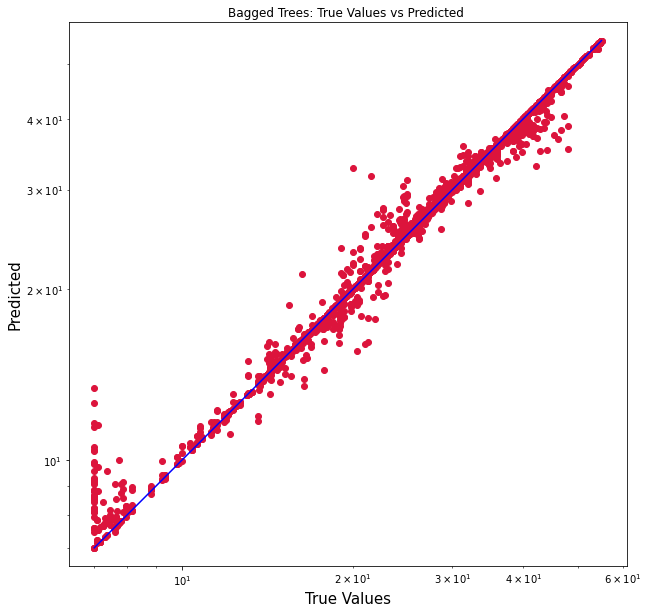

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Bagged Trees: True Values vs Predicted ")
plt.axis('equal')
plt.show()